## Цели практической работы

* Изучить и предобработать данные в задаче оттока.

* Научиться применять для решения задачи решающие деревья и оценивать результаты модели.

## Что входит в практическую работу

*  Загрузка и предобработка данных.
*  Применение и настройка линейных моделей.
*  Применение и настройка решающего дерева.
*  Сравнение моделей.
*  Оценка важности признаков.

## Что оценивается

Выполнены все задания ноутбука (заполнены пустые ячейки, даны ответы на вопросы).

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [1]:
import pandas as pd
import numpy as np



In [2]:
df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [4]:
# ваш код здесь
df.drop(columns=['State'], inplace=True)
df['Voice mail plan'] = df['Voice mail plan'].apply(lambda x: 1 if (x == 'Yes') else 0)
df['International plan'] = df['International plan'].apply(lambda x: 1 if (x == 'Yes') else 0)
df.Churn = df.Churn.astype('int64')
df

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [5]:
# ваш код здесь
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [7]:
# ваш код здесь
X = df.drop(columns=['Churn'])
y = df.Churn

Проверьте баланс классов. Является ли выборка сбалансированной?

In [8]:
# ваш код здесь
y.value_counts()
# Выборка не сбалансирована

0    2850
1     483
Name: Churn, dtype: int64

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# ваш код здесь

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [10]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_ss = std_scaler.transform(X_train)
X_test_ss = std_scaler.transform(X_test)

# ваш код здесь

После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [15]:
# ваш код здесь
X_train = pd.DataFrame(X_train_ss, columns=X.columns)
X_test = pd.DataFrame(X_test_ss, columns=X.columns)

Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


svc = SVC(kernel='linear', probability=True)
svc.fit(X_train, y_train)


# ваш код здесь

SVC(kernel='linear', probability=True)

С помощью обученных моделей сделайте предсказание на тестовых данных. Вычислите значение метрики roc-auc на тесте. 

Не забудьте, что для корректного вычисления roc-auc необходимо предсказывать не сами классы, а их вероятности (чтобы SVC мог это сделать, при объявлении модели поставьте probability=True).

In [21]:
from sklearn.metrics import roc_auc_score

pred_logreg = logreg.predict_proba(X_test)[:,1]
pred_svc = svc.predict_proba(X_test)[:,1]

print(f'Значение roc-auc для логистической регрессии: {roc_auc_score(y_test, pred_logreg)}')
print(f'Значение roc-auc для метода опорных векторов: {roc_auc_score(y_test, pred_svc)}')
# ваш код здесь

Значение roc-auc для логистической регрессии: 0.7908460867735049
Значение roc-auc для метода опорных векторов: 0.7580053519348147


Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте и вычислите на тесте roc-auc.

In [22]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
pred_tree = tree.predict_proba(X_test)[:,1]


print(f'Значение roc-auc для решающего дерева: {roc_auc_score(y_test, pred_tree)}')

# ваш код здесь

Значение roc-auc для решающего дерева: 0.8136669773595118


Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

In [23]:
# ваш код здесь
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=41)
tree1 = DecisionTreeClassifier()
tree1.fit(X_train1, y_train1)
pred_tree1 = tree1.predict_proba(X_test1)[:,1]
print(f'Значение roc-auc для решающего дерева: {roc_auc_score(y_test1, pred_tree1)}')

Значение roc-auc для решающего дерева: 0.8146516732313058


Какой вывод про масштабирование признаков для обучения дерева можно сделать?

In [ ]:
# Масштабирование не оказывает существенного влияния на качество обучения дерева.

Теперь ваша цель — максимально улучшить модели. Для этого:

1) у линейных моделей подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом);

2) у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion — gini или entropy (см. [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

Для подбора параметров используйте [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) с пятью фолдами и метрикой roc-auc или обычные циклы.

Подбор параметров осуществляется только по тренировочным данным!

После подбора гиперпараметров обучите модели с найденными гиперпараметрами на тренировочных данных, сделайте предсказания на тесте и оцените их качество (roc_auc).

In [25]:
from sklearn.model_selection import GridSearchCV
parametrs = { 'C': np.arange(0.1,10, 0.5),
            'class_weight' : ['balanced', None]}
grid = GridSearchCV(logreg, parametrs, cv=5, scoring = 'roc_auc')
grid.fit(X_train, y_train)
print(f'Лучшие параметры логистической регрессии:\n {grid.best_params_}')
print(f'Значение roc-auc для логистической регрессии: {grid.best_score_}')

parametrs = { 'C': np.arange(0.1,10, 0.5),
            'class_weight' : ['balanced', None]}
grid = GridSearchCV(svc, parametrs, cv=5, scoring = 'roc_auc')
grid.fit(X_train, y_train)
print(f'Лучшие параметры метода опорных элементов:\n {grid.best_params_}')
print(f'Значение roc-auc метода опорных элементов: {grid.best_score_}')

parametrs = { 'max_depth': range(1,11,1),
            'class_weight' : ['balanced', None],
            'criterion' : ['gini', 'entropy']}
grid = GridSearchCV(tree, parametrs, cv=5, scoring = 'roc_auc')
grid.fit(X_train, y_train)
print(f'Лучшие параметры дерева решений:\n {grid.best_params_}')
print(f'Значение roc-auc дерева решений: {grid.best_score_}')

# ваш код здесь

Лучшие параметры логистической регрессии:
 {'C': 0.6, 'class_weight': 'balanced'}
Значение roc-auc для логистической регрессии: 0.8346629789857543
Лучшие параметры метода опорных элементов:
 {'C': 0.1, 'class_weight': 'balanced'}
Значение roc-auc метода опорных элементов: 0.8349537560614346
Лучшие параметры дерева решений:
 {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4}
Значение roc-auc дерева решений: 0.8759561104891809


In [ ]:
# Лучше всего с решением задачи справилась модель дерева решений

Какая модель справилась с решением задачи лучше всего по метрике roc-auc?

Нарисуйте roc-кривую для наилучшей модели.

Text(0, 0.5, 'tpr')

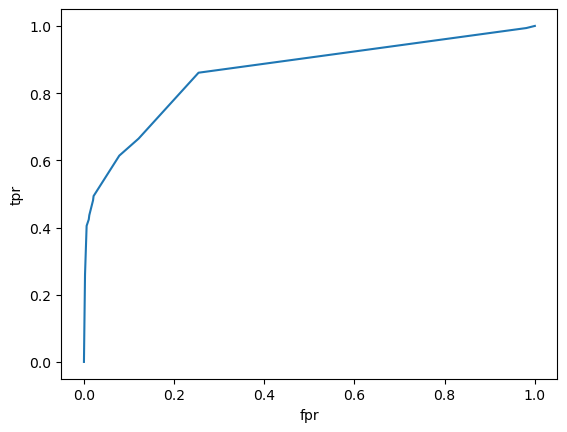

In [27]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
tree.fit(X_train, y_train)
pred_tree = tree.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, pred_tree)

plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')
# ваш код здесь

Сравните между собой две лучшие модели:

1. Насколько сильно отличается качество предсказания на тестовых данных?
(Вычислите разность значений roc-auc.)

2. Постройте гистограммы важности признаков (для линейных моделей берите модуль значений весов) для каждой из этих моделей. Сравните между собой списки из трёх самых важных признаков. Совпадают ли они?

In [28]:
# ваш код здесь
svc = SVC(kernel='linear', probability=True, C=0.1, class_weight='balanced')
svc.fit(X_train, y_train)
pred_svc = svc.predict_proba(X_test)[:,1]
roc_auc_score(y_test1, pred_tree) - roc_auc_score(y_test1, pred_svc)

0.07194293274001029

In [ ]:
# Качество моделей отличается на 0.07 метрики roc-auc

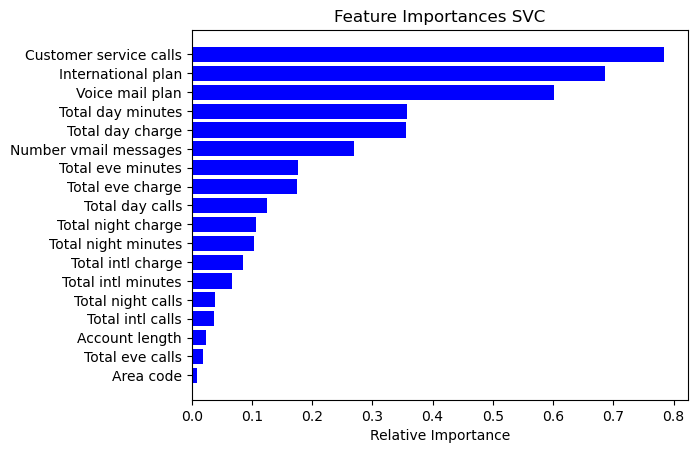

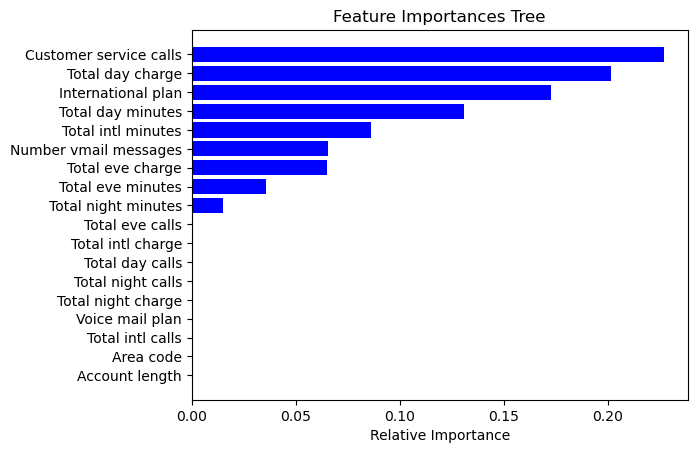

In [43]:
# ваш код здесь
features = X.columns
importances = np.array([x if x >= 0 else -x for x in svc.coef_[0] ])
indices = np.argsort(importances)

plt.title('Feature Importances SVC')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

features = X.columns
importances = tree.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances Tree')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



In [ ]:
# Списки трех самых важных признаков совпадают не полностью

Сделайте выводы:

1. Являются ли данные сбалансированными? Что это означает?

2. Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?

3. Одинаковые ли признаки важны для работы двух наилучших моделей? Почему?

1.Данные не являются сбалансированными, это означает, что кол-во значений для классов Positive(483) и Negative(2850) различно

2.Лучше всего решает задачу модель дерева решений

3.Для каждой модели важны разные признаки для работы, т.к. у моделей метода опорных элементов и дерева решений совершенно разные 
адгоритмы работы.